# Ch 4 - Training Models

This JN contains the Python code associated with Chapter 4 "Training Models" of the book.

Please refer to the associated notes for more information.

## Linear Regression

Here we write Python code to "solve" a linear regression problem. We simply create and use random linearly-related data to implement our code on.

In [1]:
import numpy as np
from numpy.random import rand, randn

X = 2*rand(100,1)
y = 4+3*X + randn(100,1)

In [2]:
X[:20]

array([[1.78028985],
       [0.46974172],
       [0.66551868],
       [0.33997925],
       [0.31930583],
       [1.65789332],
       [0.94504384],
       [1.57948724],
       [0.75394804],
       [0.4607818 ],
       [0.47690183],
       [0.44369599],
       [0.89841536],
       [0.98651264],
       [1.50112664],
       [0.51362263],
       [1.60399554],
       [1.01097752],
       [1.67001988],
       [0.20627757]])

In [3]:
y[:20]

array([[8.24385714],
       [5.05650378],
       [4.84391532],
       [3.95667362],
       [4.9607356 ],
       [8.64916352],
       [5.98996365],
       [7.82884476],
       [7.39632334],
       [3.85587056],
       [4.98180208],
       [5.07187515],
       [7.62916166],
       [5.99257884],
       [8.63732966],
       [6.00532482],
       [9.39875837],
       [6.40571963],
       [9.64773649],
       [5.39500811]])

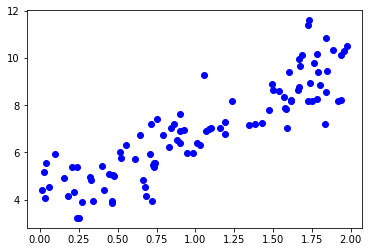

In [4]:
import matplotlib.pyplot as plt

plt.plot(X,y, "bo")

Now, let's find the linear regression model that fits this data with minimial MSE using the normal equation:

In [5]:
X_b = np.c_[np.ones((100,1)), X]

In [6]:
X_b[:20]

array([[1.        , 1.78028985],
       [1.        , 0.46974172],
       [1.        , 0.66551868],
       [1.        , 0.33997925],
       [1.        , 0.31930583],
       [1.        , 1.65789332],
       [1.        , 0.94504384],
       [1.        , 1.57948724],
       [1.        , 0.75394804],
       [1.        , 0.4607818 ],
       [1.        , 0.47690183],
       [1.        , 0.44369599],
       [1.        , 0.89841536],
       [1.        , 0.98651264],
       [1.        , 1.50112664],
       [1.        , 0.51362263],
       [1.        , 1.60399554],
       [1.        , 1.01097752],
       [1.        , 1.67001988],
       [1.        , 0.20627757]])

In [7]:
from numpy.linalg import inv

theta_parameters = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_parameters

array([[3.87220278],
       [2.96086774]])

So, we have obtained the model parameters

$$ \theta_0 = 3.98620893 \quad\text{and}\quad \theta_1 = 3.04102422 $$

Hence, our linear regression model is simply: $\hat{\theta} = 3.9862 + 3.0410\cdot x$

**Note:** The way that we created the fake data was through the equation $y=4+3x+\text{noise}$, and we see our computed parameters (approximations) are very close to the true values of 4 and 3! Of course, they cannot be exact as the linear regression model cannot deal with random noise.

As usual, once we have our model we can then use it to make predictions!

In [8]:
def lin_reg_model(x):
    return 3.98620893 + 3.04102422 * x

In [9]:
lin_reg_model(5)

19.191330030000003

We can also use the original vector form of the linear model:

In [10]:
X_new = np.array([[5], [0]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 

X_new_b

array([[1., 5.],
       [1., 0.]])

In [11]:
y_predict = X_new_b.dot(theta_parameters)
y_predict

array([[18.67654148],
       [ 3.87220278]])

We can also plot our linear model against the data to visualize how it looks:

(0.0, 2.0, 0.0, 12.0)

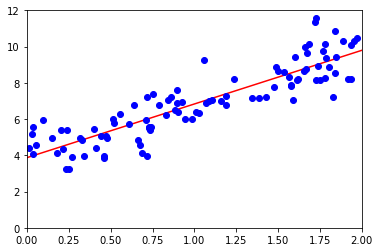

In [12]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "bo")
plt.axis([0,2,0,12])

As usual and as we have already seen, we can use SKL to build a linear regression model automatically:

In [13]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)

LinearRegression()

In [14]:
linear_regression_model.intercept_

array([3.87220278])

In [15]:
linear_regression_model.coef_

array([[2.96086774]])

As expected, we get the same model parameters as when we implemented linear regression from scratch.

**Aside:** As it happens, SKL's 'LinearRegression' class actually uses SciPy's least squares 'linalg.lstsq()' function under-the-hood, so we could have used that instead, as shown below:

In [16]:
from numpy.linalg import lstsq

theta_best_svd, residuals, rank, s = lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.87220278],
       [2.96086774]])

Again, we get the same model parameters as before.

**Aside:** This SciPy function actually uses the Moore-Penrose pseudoinverse, which itself is computed by first finding the singular value decomposition of the matrix in question. Some of the benefits of using this are:
* It is more efficient than using the normal equation
* This method can handle edge cases
    * Normal equation may not work if the matrix $X^TX$ is not invertible!

## Gradient Descent

**Batch Gradient Descent**

In [17]:
learning_rate = 0.1
num_iterations = 1000
m = 100 # Number of instances

theta = randn(2,1) # This is our inital guess (i.e. "random initialization")

In [18]:
for step in range(num_iterations):
    gradient_vector = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradient_vector
    
theta

array([[3.87220278],
       [2.96086774]])

Indeed, we get the same model parameters as before, using both the normal equation as well as SKL built-in LinearRegression class!

**Stochastic Gradient Descent**

In [19]:
num_epochs = 50
t0, t1 = 5, 50 # Hyperparameters for the learning schedule
m = 100 # Number of instances

def learning_schedule(t):
    return t0 / (t+t1)

theta = randn(2,1) # The random initialization

In [33]:
from numpy.random import randint

for epoch in range(num_epochs):
    for instance in range(m):
        
        random_index = randint(m)
        
        # Need to define x_i and y_i this way so that
        # the gradient vector can be computed
        x_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        
        gradient_vector = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        
        eta = learning_schedule(epoch*m+instance)
        
        theta = theta - eta * gradient_vector
theta

array([[3.89188564],
       [2.92229496]])

So as expected we get a decent **approximation** to the optimal model parameters. Re-running the above cell will give you different results each time.

As usual, we can use SKL to do stochastic gradient descent for us:

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=1000,
                         tol = 0.001,
                        penalty = None,
                        eta0 = 0.1)

sgd_model.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [39]:
sgd_model.intercept_

array([3.92035036])

In [40]:
sgd_model.coef_

array([3.00210561])

Again, we get model parameters that are only an approximation to the true global minimum parameters.

**Mini-batch Gradient Descent**

In [41]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [42]:
theta

array([[3.85112212],
       [2.92147673]])

## Polynomial Regression

In [189]:
np.random.seed(42)

In [190]:
m = 100 # Number of instances

X = 6*rand(m,1)-3
y = 0.5 * X**2 + X + 2 + randn(m,1)

(-3.0, 3.0, 0.0, 10.0)

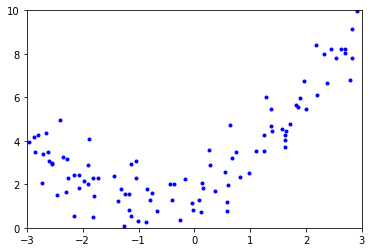

In [191]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])

Obviously a straight line would not fit this data nicely! So, we create some (a single, in this case) new features and create a linear model on the new and old features.

In [91]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,
                                  include_bias= False)

X_poly = poly_features.fit_transform(X)

In [92]:
X[:5]

array([[-1.1350212 ],
       [ 1.91392332],
       [-0.99148425],
       [-1.83771889],
       [-2.33812005]])

In [93]:
X_poly[:5]

array([[-1.1350212 ,  1.28827313],
       [ 1.91392332,  3.66310249],
       [-0.99148425,  0.98304102],
       [-1.83771889,  3.37721071],
       [-2.33812005,  5.46680537]])

As you can see, we were able to use the 'PolynomialFeatures' class to create a new feature that is simply the square of the original feature X.

Now, we can fit a linear model to this new set of features (with the usual y labels) like so:

$$ y = \theta_0 + \theta_1x_1 + \theta_2x_1^2 $$

where $x_1$ was the original feature and $x_1^2$ is the new feature that was created.

**Note: This is indeed a linear model with respect to the *model parameters*!**

In [94]:
poly_linear_model = LinearRegression()
poly_linear_model.fit(X_poly, y)

LinearRegression()

In [95]:
poly_linear_model.intercept_

array([1.96032373])

In [96]:
poly_linear_model.coef_

array([[1.03055703, 0.49352825]])

So our model has the formula:

$$ \hat{y} = 1.96 + 1.02x_1 + 0.49x_1^2 $$

which is a pretty close approximation to the original quadratic function we used to create the data!

Visually:

(-3.0, 3.0, 0.0, 10.0)

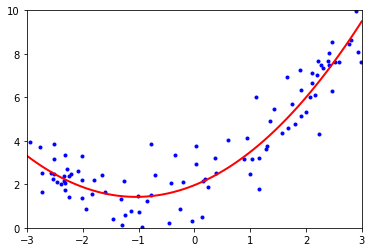

In [97]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poly_linear_model.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.axis([-3, 3, 0, 10])

## Learning Curves

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)
    train_errors, validation_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predictions = model.predict(X_train[:m])
        y_valid_predictions = model.predict(X_valid)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predictions))
        validation_errors.append(mean_squared_error(y_valid, y_valid_predictions))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(validation_errors), "b-", linewidth=3, label="validation")    

We start by looking at the learning curve of our linear regression model (underfitting)

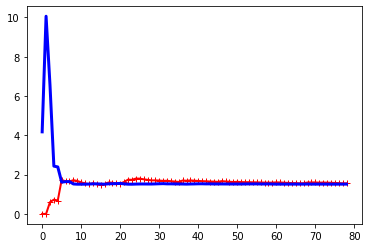

In [99]:
linear_model = LinearRegression()
plot_learning_curves(linear_model, X, y)

Next, we look at the learning curve of a 10th-degree polynomial (overfitting)

(0.0, 80.0, 0.0, 5.0)

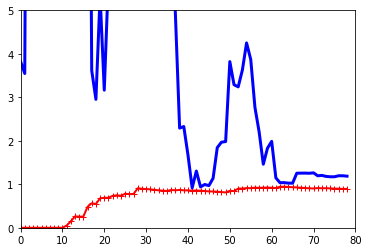

In [132]:
from sklearn.pipeline import Pipeline

degree_10_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_model", LinearRegression())
])

plot_learning_curves(degree_10_regression, X, y)
plt.axis([0, 80, 0, 5])

## Regularized Linear Models

**Ridge Regression**

In [119]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=1, solver="cholesky")
ridge_regression.fit(X, y)
ridge_regression.predict([[1.5]])

array([[5.22538002]])

Something to note is that the above is simply computing the closed-form solution but is using the Cholesky decomposition of a matrix.

In [121]:
sgd_ridge_regression = SGDRegressor(penalty="l2")
sgd_ridge_regression.fit(X, y.ravel())
sgd_ridge_regression.predict([[1.5]])

array([5.21896527])

Here, the 'penalty' hyperparameter allows us to define the "type" of regularization term to use. In this case, we specified that it should use the l2-norm as we discussed in the notes.

As expected, both regression models yield approximately the same result, with the SGD regressor giving us a less accurate value.

**Lasso Regression**

In [122]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(X, y)

Lasso(alpha=0.1)

In [124]:
lasso_regression.predict([[1.5]])

array([5.18599258])

**Elastic Net**

In [125]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [126]:
elastic_net.predict([[1.5]])

array([5.18572379])

**Early Stopping**

In [177]:

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)



In [192]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [193]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("standard_scaler", StandardScaler())    
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_valid_poly_scaled = poly_scaler.transform(X_val)

**NOTE:** In the model instantiation below, by setting the parameter 'warm_start' to True, this means that when we fit the data, it will continue training where it left off (in the training set) instead of starting from scratch!!

In [194]:
sgd_model = SGDRegressor(max_iter=1,
                        tol=-np.infty,
                        warm_start=True,
                        penalty=None,
                        learning_rate="constant",
                        eta0=0.0005)

In [195]:
minimum_valid_error = float("inf")
best_epoch = None
best_model = None

num_epochs = 500
train_errors, val_errors = [], []

for epoch in range(num_epochs):
    sgd_model.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd_model.predict(X_train_poly_scaled)
    y_valid_predict = sgd_model.predict(X_valid_poly_scaled)
    
    valid_error = mean_squared_error(y_val, y_valid_predict)
    train_error = mean_squared_error(y_train, y_train_predict)
    
    train_errors.append(train_error)
    val_errors.append(valid_error)
        
    if valid_error < minimum_valid_error:
        minimum_valid_error = valid_error
        best_epoch = epoch
        best_model = clone(estimator=sgd_model)

Text(0, 0.5, 'RMSE')

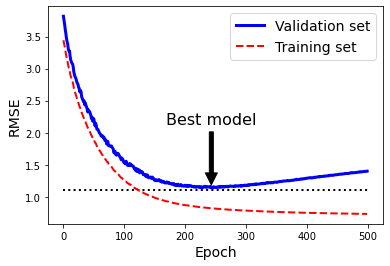

In [196]:
#best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better

plt.plot([0, num_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)

plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [197]:
best_epoch

243

In [198]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)